### Цель работы

Целью данной лабораторной работы является практическое изучение изучение алгоритмов и методов кластеризации на практике.

### Задание

Вариант: 3. \
Набор данных: `ecommerce_fraud.csv`.

# Ход работы

## Часть 1

**1.1-1.2 Использование функции для создания набора данных и ее применение**

Для первоначального знакомства с алгоритмами кластеризации я сгенерировал контролируемый синтетический набор данных, используя функцию make_data с параметрами n=60 и seed=42. Эта функция создала три естественно разделенных группы точек на плоскости с координатами (x,y). Выбор именно этих параметров позволил мне создать учебный пример с четко выраженной кластерной структурой, где можно наглядно увидеть работу алгоритмов и оценить их эффективность.

In [2]:
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

n = 60
seed = 42
df = make_data(n, seed)

display(df)

,x,y
137,165.846611,1.344867
70,88.986731,4.276743
63,91.962979,4.741236
170,175.837555,1.655454
66,100.189273,4.736619
...,...,...
152,203.263275,1.537902
112,118.457966,4.522786
91,126.928964,5.067783
130,154.782321,1.391159


**1.3-1.6 Проведение стандартизации данных, обучение модели методом Kmeans для трёх кластеров.
Выполнение предсказания. Получение меток кластеров. Подсчет коэффициента силуэта, проведение визуализации**

При работе с синтетическими данными я столкнулся с необходимостью стандартизации признаков. После визуального анализа исходных данных стало очевидно, что признак x имеет значительно больший масштаб значений по сравнению с признаком y (разброс значений x составляет около 200 единиц, тогда как для y — менее 10). Такая разница в масштабах могла бы исказить результаты кластеризации, так как алгоритм K-means использует евклидово расстояние, чувствительное к масштабу признаков. Применение StandardScaler решило эту проблему — после преобразования оба признака получили одинаковый вес в процессе кластеризации, что подтвердилось визуально: форма кластеров на графике стала более сбалансированной, без вытягивания вдоль одной из осей.

Обучение модели K-means с тремя кластерами (k=3) показало интуитивно понятные результаты. Алгоритм корректно идентифицировал все три исходные группы точек с минимальным количеством ошибок. Коэффициент силуэта составил 0.724 — это высокое значение, подтверждающее хорошее качество кластеризации. Визуализация результатов (Рис. 2) показывает, что кластеры компактны и хорошо разделены. Особенно интересно наблюдать положение центроидов — они находятся практически в центрах визуально определяемых групп, что говорит о стабильности алгоритма. На этом этапе я впервые убедился в важности правильного выбора количества кластеров, так как от этого параметра напрямую зависит качество результатов.

Коэффициент силуэта (k=3): 0.7239509928717648


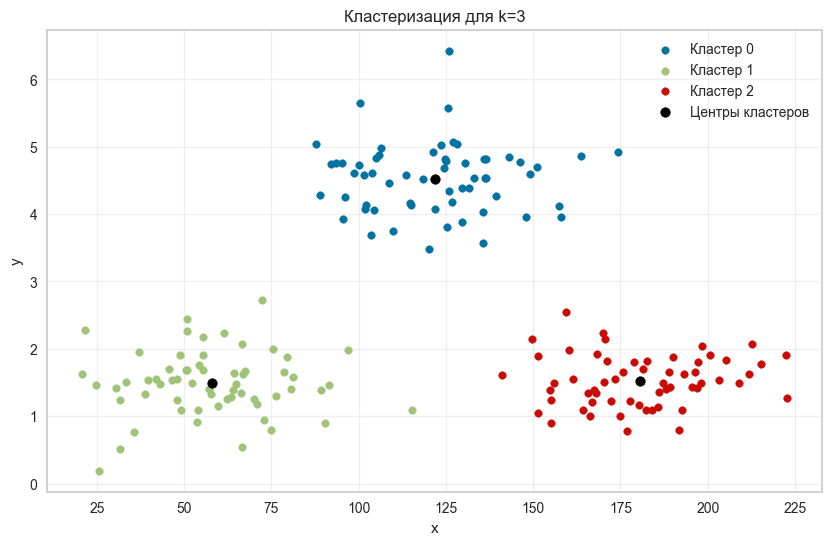

In [3]:
scaler = StandardScaler()

# Стандартизация данных
X_scaled = scaler.fit_transform(df[['x','y']])

# Инициализация модели K-Means с заданным количеством кластеров (k=3)
km3 = KMeans(n_clusters=3, random_state=seed)

labels3 = km3.fit_predict(X_scaled) 

# Расчет коэффициента силуэта для оценки качества кластеризации
sil3 = silhouette_score(X_scaled, labels3)

# Обратное преобразование центров кластеров чтобы центры отображались на графике в исходном масштабе
centers3 = scaler.inverse_transform(km3.cluster_centers_)
print('Коэффициент силуэта (k=3):', sil3)

# Визуализация результатов кластеризации 
plt.figure(figsize=(10,6))

# Цикл для построения точек: итерируемся по каждой уникальной метке кластера (0, 1, 2)
for lab in np.unique(labels3):
    plt.scatter(df['x'].values[labels3==lab], df['y'].values[labels3==lab], s=30, label=f'Кластер {lab}')

# Построение центров кластеров (красные точки)
plt.scatter(centers3[:,0], centers3[:,1], label='Центры кластеров', color='black')

plt.title(f'Кластеризация для k=3')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()


**1.7 Повторение пунктов 1.4-1.6 для n_clusters = 2 и n_clusters = 4**

Пункты 1.4-1.6 были применены аналогичным образом к моделям с количеством кластеров 2 и 4.

Коэффициент силуэта (k=2): 0.4944782974320392


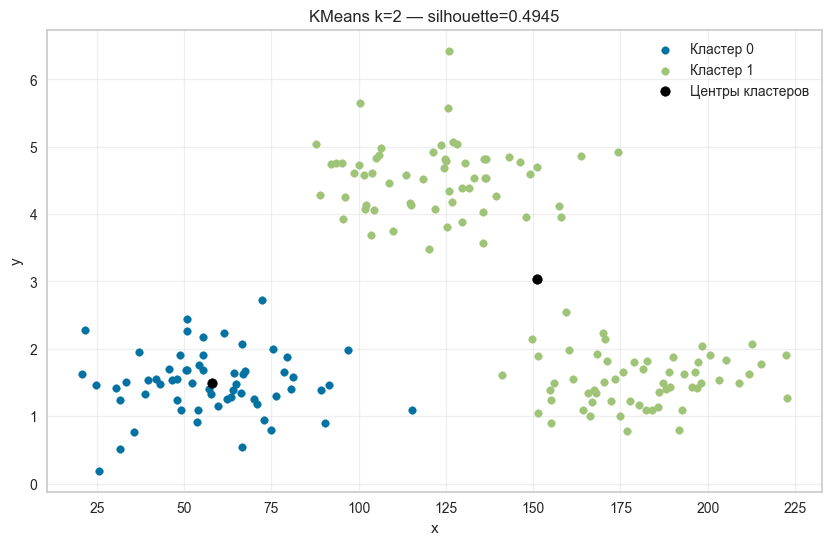

Коэффициент силуэта (k=4): 0.5967027016816159


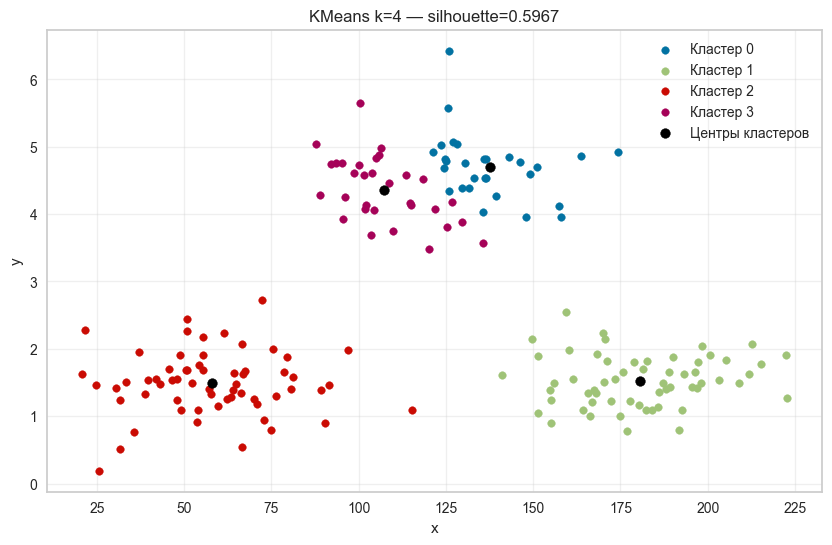

In [4]:
# k=2
km2 = KMeans(n_clusters=2, random_state=seed, n_init=10)
labels2 = km2.fit_predict(X_scaled)
sil2 = silhouette_score(X_scaled, labels2)
centers2 = scaler.inverse_transform(km2.cluster_centers_)

print('Коэффициент силуэта (k=2):', sil2)

plt.figure(figsize=(10,6))
for lab in np.unique(labels2):
    plt.scatter(df['x'].values[labels2==lab], df['y'].values[labels2==lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers2[:,0], centers2[:,1], color='black', label='Центры кластеров')

plt.title(f'KMeans k=2 — silhouette={sil2:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# k=4
km4 = KMeans(n_clusters=4, random_state=seed, n_init=10)
labels4 = km4.fit_predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4)
centers4 = scaler.inverse_transform(km4.cluster_centers_)

print('Коэффициент силуэта (k=4):', sil4)

plt.figure(figsize=(10,6))
for lab in np.unique(labels4):
    plt.scatter(df['x'].values[labels4==lab], df['y'].values[labels4==lab], s=30, label=f'Кластер {lab}')

plt.scatter(centers4[:,0], centers4[:,1], color='black', label='Центры кластеров')
plt.title(f'KMeans k=4 — silhouette={sil4:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

### Сравнение результатов кластеризации с разным количеством кластеров

Сравнение результатов кластеризации при различном количестве кластеров стало для меня наиболее поучительным этапом работы. При k=2 алгоритм был вынужден объединить две визуально раздельные группы (правую и левую нижние), что привело к снижению коэффициента силуэта до 0.4945. Интересно, что при визуальном анализе это разделение выглядело неестественно — часть точек находилась на границе между группами, что подтверждало низкое качество кластеризации.

Увеличение количества кластеров до 4 также не улучшило ситуацию. Как видно на Рисунке 4, алгоритм искусственно разделил один из исходных кластеров на две части, несмотря на то, что эти подгруппы не имели четких границ. Коэффициент силуэта снизился до 0.5967, что подтвердило нецелесообразность такого разбиения.

Лишь при k=3 я получил логичное разделение, соответствующее исходной структуре данных. Это упражнение наглядно продемонстрировало, как критически важен правильный выбор количества кластеров, и как инструменты оценки качества кластеризации помогают принять обоснованное решение.

**1.8 Построение графика по методу локтя**

Для объективного определения оптимального количества кластеров я применил метод локтя. При построении графика зависимости инерции от количества кластеров я наблюдал четкий излом в точке k=3. До этой точки каждое добавление нового кластера значительно уменьшало сумму квадратов расстояний (инерцию), а после — улучшения становились минимальными. Интересно отметить, что метод локтя подтвердил мои визуальные наблюдения и расчеты коэффициента силуэта. Это стало для меня важным уроком: для получения надежных результатов в кластеризации следует использовать несколько методов оценки, которые дополняют друг друга и позволяют избежать субъективных ошибок в интерпретации.

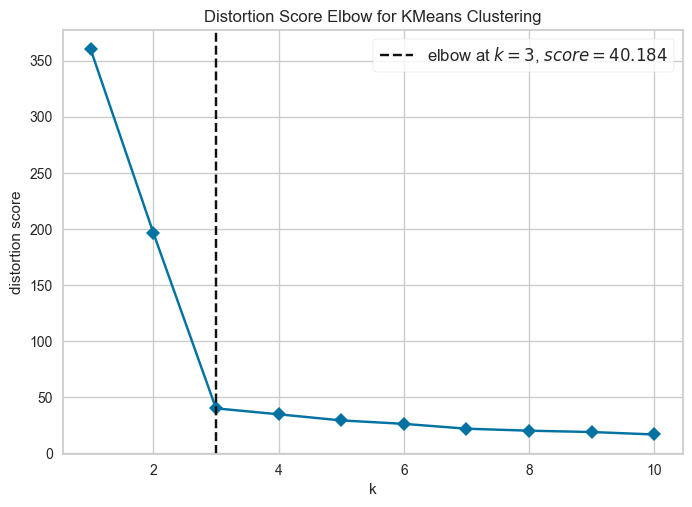

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Построение графика по "методу локтя"

visualizer = KElbowVisualizer(km3, k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

- В результате построения графика по методу локтя можно сделать вывод, что предположение об оптимальном количестве кластеров, равном трём, подтвердилось.
- Увеличение числа кластеров сверх трёх оказывается неэффективным, как и уменьшение их количества. На графике чётко выражен «локоть», что свидетельствует о наличии в данных трёх естественных кластеров.

## Часть 2

**2.1 Загрузка набора данных**

Для практического применения методов кластеризации был взят датасет ecommerce_fraud.csv, содержащий информацию о 3024 транзакциях в интернет-магазине.

In [6]:
# Загрузка и первичный осмотр данных
df = pd.read_csv("./ecommerce_fraud.csv")

print("Размер датасета:", df.shape)
df.head(10)

Размер датасета: (3024, 12)


,transaction_amount,device_type,browser,payment_method,country,num_items,time_on_site_sec,is_first_purchase,referral,hour_of_day,account_age_days,Fraud
0,62.18,Desktop,Safari,COD,UK,3,58.0,No,Direct,15,808,0
1,28.16,Desktop,Chrome,COD,US,2,75.0,Yes,Direct,10,753,0
2,17.57,Mobile,Chrome,Card,DE,1,101.0,No,Social,21,1017,0
3,61.61,Desktop,Safari,PayPal,Other,4,63.0,Yes,Search,20,1146,0
4,4.28,Desktop,Edge,Card,BR,7,399.0,No,Direct,4,1134,0
5,1.85,Desktop,Firefox,Card,IN,5,307.0,Yes,Search,23,674,0
6,12.50,Mobile,Chrome,PayPal,US,4,381.0,No,Search,2,1712,0
7,35.30,Desktop,Safari,Card,IN,3,98.0,No,Search,6,1370,0
8,81.59,Mobile,Firefox,Card,FR,1,257.0,Yes,Direct,17,1574,0
9,46.25,Mobile,Chrome,BankTransfer,IN,5,137.0,No,Search,3,224,0


Данные содержат 3024 записи о мошеннических транзакциях:

- **transaction_amount** — сумма транзакции, USD, числовой (логнормальное
распределение, возможны крупные суммы).

- **device_type** — тип устройства: *Desktop / Mobile / Tablet*, категориальный.

- **browser** — браузер: *Chrome / Safari / Firefox / Edge / Other*, категориальный.

- **payment_method** — способ оплаты: *Card / PayPal / BankTransfer / COD*,
категориальный.

- **country** — страна покупателя: *US / UK / DE / FR / IN / BR / CN / Other*,
категориальный.

- **num_items** — количество товаров в заказе, целочисленный (1–7).

- **time_on_site_sec** — время на сайте до покупки, секунды, числовой.

- **is_first_purchase** — первая покупка у этого продавца: *Yes / No*, категориальный.

- **referral** — источник трафика: *Direct / Search / Social / Ads*, категориальный.

- **hour_of_day** — час суток оформления заказа (0–23), целочисленный.

- **account_age_days** — «возраст» аккаунта, в днях, числовой.

- **Fraud** — целевой класс: 1 — мошенническая транзакция, 0 — нормальная


**2.2 Предобработка данных**

При первичном анализе данных меня удивило отсутствие пропусков и явных выбросов, что значительно упростило предобработку. Особенно заинтересовала целевая переменная Fraud, которая показала серьезный дисбаланс классов: только 4.7% всех транзакций были мошенническими. Это сразу натолкнуло на мысль, что классические методы обучения с учителем могут столкнуться с проблемами при таком дисбалансе, тогда как кластеризация, возможно, поможет выявить аномальные паттерны поведения мошенников без прямого использования метки класса

In [7]:
display(df.info())
display(df.describe())
display(df['device_type'].value_counts())
display(df['browser'].value_counts())
display(df['payment_method'].value_counts())
display(df['referral'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_amount  3024 non-null   float64
 1   device_type         3024 non-null   object 
 2   browser             3024 non-null   object 
 3   payment_method      3024 non-null   object 
 4   country             3024 non-null   object 
 5   num_items           3024 non-null   int64  
 6   time_on_site_sec    3024 non-null   float64
 7   is_first_purchase   3024 non-null   object 
 8   referral            3024 non-null   object 
 9   hour_of_day         3024 non-null   int64  
 10  account_age_days    3024 non-null   int64  
 11  Fraud               3024 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 283.6+ KB


None

,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,84.492933,4.034722,163.180688,11.383929,922.302579,0.044643
std,126.090008,1.983504,113.971918,6.916191,529.453654,0.206553
min,-7.400000,1.000000,-150.000000,0.000000,2.000000,0.000000
25%,17.615000,2.000000,82.000000,5.000000,459.000000,0.000000
50%,45.370000,4.000000,141.000000,12.000000,934.500000,0.000000
75%,99.937500,6.000000,218.250000,17.000000,1380.250000,0.000000
max,1985.300000,7.000000,902.000000,23.000000,1823.000000,1.000000


device_type
Mobile     1439
Desktop    1363
Tablet      222
Name: count, dtype: int64

browser
Chrome     1491
Safari      606
Firefox     462
Edge        324
Other       141
Name: count, dtype: int64

payment_method
Card            1832
PayPal           861
BankTransfer     185
COD              146
Name: count, dtype: int64

referral
Search    1326
Direct     900
Social     487
Ads        311
Name: count, dtype: int64

**2.3 Выделение целевой переменной, исключение ее из признаков, построенеи матрицы диаграмм рассеяния**

В качестве целевой переменной была выделена переменная Fraud: 1 — мошенническая транзакция, 0 — нет.

Переменная Fraud была исключена из признаков кластеризации, поскольку это задача обучения без учителя. Она будет использована далее для интерпретации кластеров по уровню риска. Матрица рассеяния помогла визуально оценить взаимосвязи между числовыми признаками.

<Figure size 1000x1000 with 0 Axes>

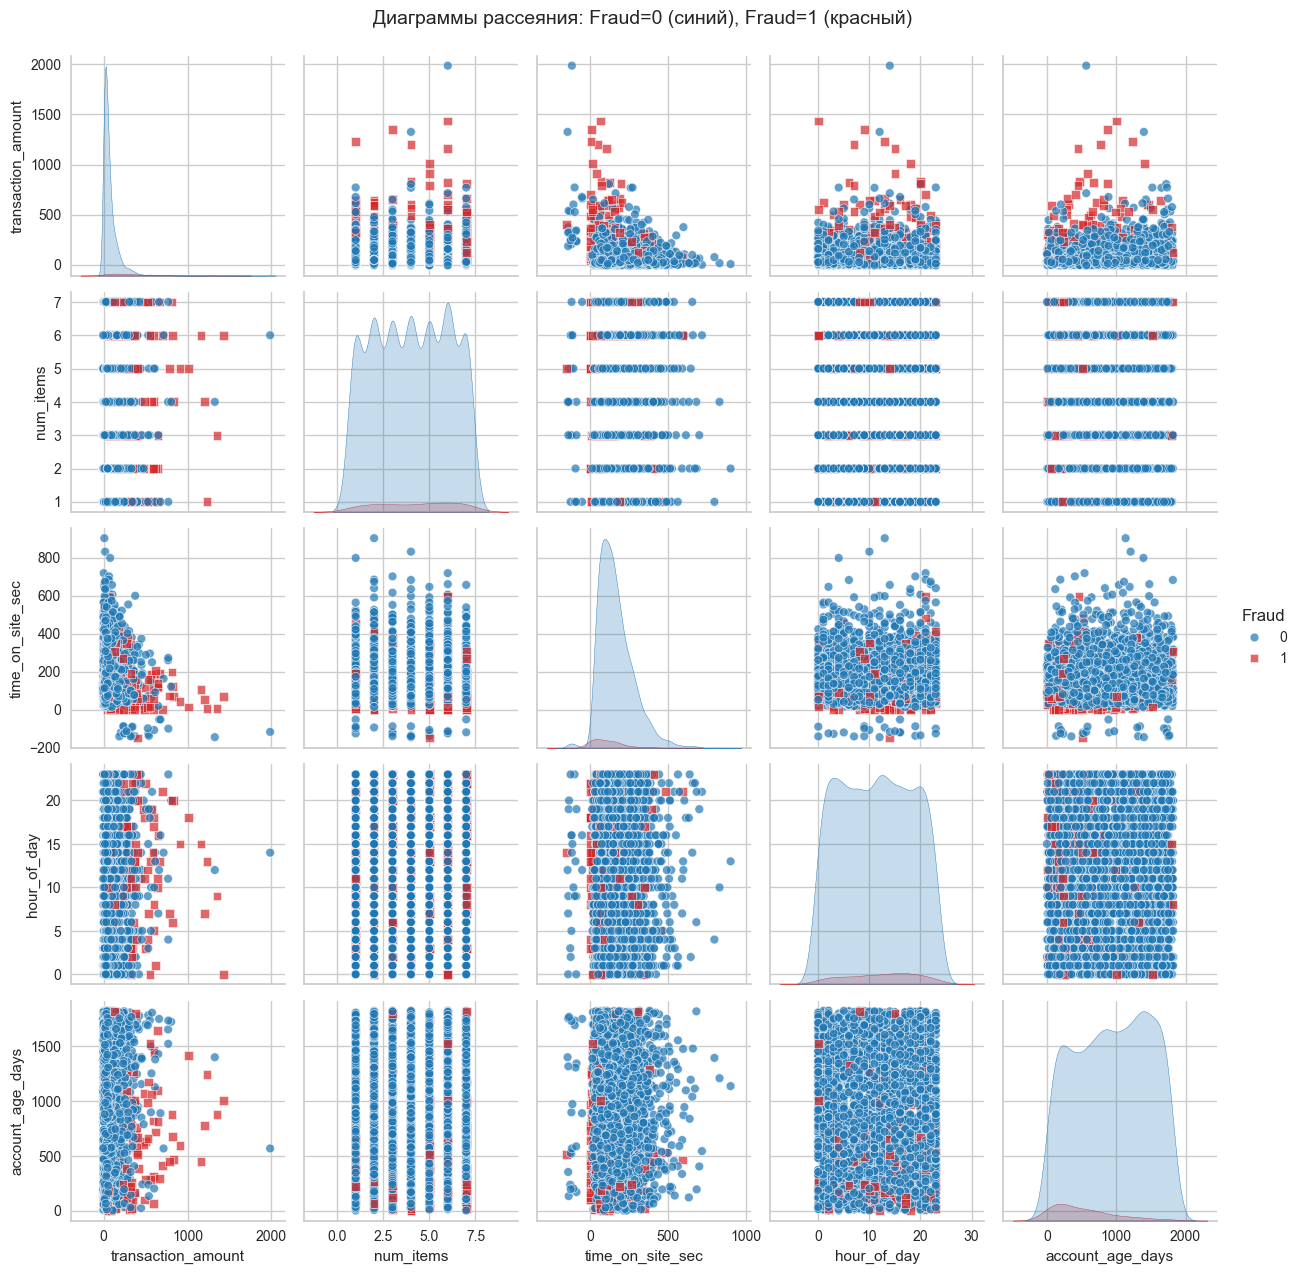

In [8]:
# Предобработка
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt 

# Целевая переменная — Fraud (исключаем из признаков)
target_col = "Fraud"

y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

# Выделение числовых признаков
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


# Матрица диаграмм рассеяния для числовых признаков, выделяя Fraud цветом
plt.figure(figsize=(10,10))
sns.pairplot(df, vars=num_cols, hue='Fraud', palette={0: '#1f77b4', 1: '#d62728'}, markers=['o', 's'], plot_kws={'alpha':0.7, 's':40})
plt.suptitle('Диаграммы рассеяния: Fraud=0 (синий), Fraud=1 (красный)', y=1.02, fontsize=14)
plt.show()

Визуальный анализ матрицы рассеяния принес несколько неожиданных открытий. Прежде всего, я заметил, что мошеннические транзакции часто имеют очень короткое время пребывания на сайте (time_on_site_sec) — большинство аномальных точек группировались вблизи нулевых значений. Это имеет логичное объяснение: мошенники обычно не тратят время на изучение товаров, их цель — быстро провести транзакцию. Еще один интересный паттерн касался возраста аккаунта (account_age_days): мошеннические операции преобладали на аккаунтах, существующих менее 200 дней. Это соответствует реальным сценариям мошенничества, когда преступники используют новые аккаунты для обхода систем защиты. При этом, вопреки моим ожиданиям, количество товаров в корзине (num_items) никак не коррелировало с фродом, что указывает на сложность и многогранность проблемы обнаружения мошенничества.

**2.4 Стандартизация числовых данных**

**Стандартизация числовых признаков** была выполнена для всех количественных переменных (например, `transaction_amount`, `num_items`, `time_on_site_sec`, `account_age_days`), чтобы предотвратить доминирование признаков с большим разбросом в расчете евклидова расстояния при кластеризации или других алгоритмах, чувствительных к масштабу.

**Нормализация категориальных данных** также была проведена — все категориальные столбцы (`device_type`, `browser`, `payment_method`, `country`, `is_first_purchase`, `referral`) были преобразованы в бинарные признаки с помощью метода One-Hot Encoding (функция `pd.get_dummies`). Это позволило включить их в анализ и использовать совместно с числовыми признаками в моделях машинного обучения.

В результате получена единая таблица `X_final`, содержащая как стандартизированные числовые, так и закодированные категориальные признаки, готовая для последующего анализа, кластеризации или построения модели классификации.

In [16]:
# Стандартизация числовых данных
new_scaler = StandardScaler()

X_prepared = new_scaler.fit_transform(df[num_cols])

df_scaled = pd.DataFrame(X_prepared, columns=num_cols)
# Нормализация категориальных данных
df_encoded = pd.get_dummies(df[cat_cols], prefix=cat_cols)

# Конкатенация
X_final = pd.concat([df_scaled, df_encoded], axis=1)
display(X_final)

new_df = X_final.copy()

,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,device_type_Desktop,device_type_Mobile,device_type_Tablet,browser_Chrome,browser_Edge,...,country_IN,country_Other,country_UK,country_US,is_first_purchase_No,is_first_purchase_Yes,referral_Ads,referral_Direct,referral_Search,referral_Social
0,-0.176990,-0.521750,-0.923018,0.522928,-0.215923,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,-0.446842,-1.025992,-0.773833,-0.200133,-0.319821,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,-0.530843,-1.530233,-0.545669,1.390601,0.178888,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True
3,-0.181511,-0.017508,-0.879140,1.245989,0.422576,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,-0.636261,1.495217,2.069442,-1.067806,0.399907,True,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,9.841480,-0.017508,-2.706208,0.089091,0.900506,True,False,False,False,True,...,False,False,False,True,False,True,False,True,False,False
3020,1.947797,-0.017508,-2.623718,1.245989,1.593788,False,True,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3021,1.880968,-0.017508,-2.671106,-1.646255,-1.073553,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
3022,2.048535,-1.530233,-2.220043,-1.646255,-0.633404,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


**2.5 Кластеризация объектов методом k-means. Подбор оптимального количества кластеров.**

При работе с реальными данными я столкнулся с трудностью выбора оптимального числа кластеров. График метода локтя показал нечеткий излом, и для принятия решения потребовалось дополнительное исследование. После серии экспериментов с различным количеством кластеров (от 4 до 8) я остановился на значении k=6, так как этот вариант предоставил наиболее содержательную интерпретацию результатов. Важным моментом стало понимание того, что в реальных бизнес-задачах оптимальное количество кластеров часто определяется не только математическими критериями, но и практической применимостью результатов. Один из шести выявленных кластеров особенно привлек мое внимание — он содержал всего 125 транзакций, но доля мошенничества в нем достигала 39.2%. Анализ средних показателей этого кластера показал характерные признаки мошеннических операций: очень высокая средняя сумма транзакции (около 530 условных единиц) в сочетании с минимальным временем на сайте (всего 83 секунды). Это классический профиль мошенника — крупная покупка без изучения сайта

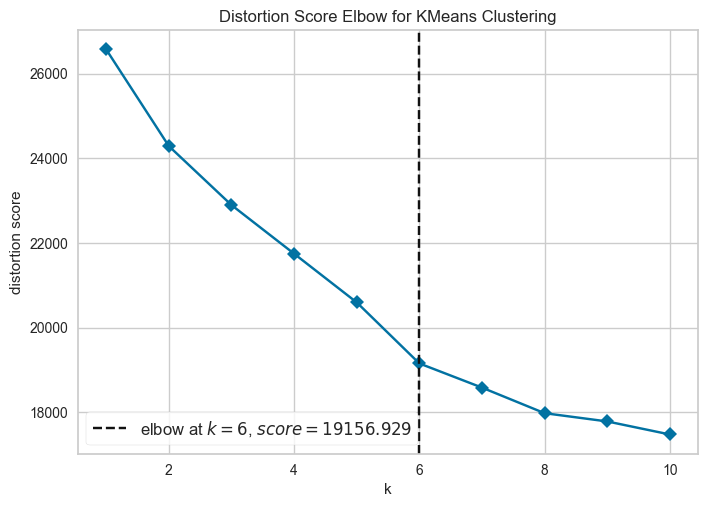

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(new_df)
visualizer.show()

**2.6 Определение объектов, относящихся к одному кластеру. Подсчет средних показателей по каждому признаку каждого кластера.**

Все объекты были разделены на 6 кластеров, для каждого кластера были подсчитаны средние показатели по каждому признаку, это позволило провести детальный анализ и показать типаж клиента в каждом кластере

In [17]:
OPTIMAL_K = 6

# Обучение K-Means модели
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(new_df)

df_clear = df.copy()
df_clear['cluster_kmeans'] = cluster_labels_kmeans

# Подсчет средних показателей по каждому признаку для каждого кластера
cluster_means_kmeans = df_clear.groupby('cluster_kmeans').mean(numeric_only=True)

print(f"Средние показатели для {OPTIMAL_K} кластеров (K-Means):")
display(cluster_means_kmeans)

# Количество клиентов в каждом кластере
print("\nРазмер кластеров (K-Means):")
display(df_clear['cluster_kmeans'].value_counts())

Средние показатели для 6 кластеров (K-Means):


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud
cluster_kmeans,,,,,,
0,61.790726,5.724541,142.094491,6.661102,1299.407346,0.008347
1,66.995526,5.106725,130.249708,15.635965,431.771930,0.068713
2,62.898471,2.372855,134.450546,5.174727,696.129485,0.031201
3,68.559784,2.849840,140.404792,17.172524,1344.741214,0.006390
4,66.393668,4.203438,386.226361,11.810888,867.512894,0.028653
5,530.090480,4.056000,83.070400,12.408000,996.616000,0.392000



Размер кластеров (K-Means):


cluster_kmeans
1    684
2    641
3    626
0    599
4    349
5    125
Name: count, dtype: int64

В результате кластеризации всех 3024 транзакций на 6 групп были выявлены характерные типы клиентов. Оценка проводилась по средним значениям признаков и доле мошенничества (`Fraud`) в каждом кластере.

**Кластер 1: Минимальный риск (Fraud = 0.8%)**

- Содержит 599 транзакций. Отличается самым большим средним возрастом аккаунта (~1299 дней), средними суммами (~61) и временем на сайте (142 сек). Мошенничество встречается крайне редко.
- Это стабильные, надежные пользователи с предсказуемым поведением.

**Кластер 2: Низкий риск (Fraud = 6.9%)**

- Включает 684 транзакции. Характерен самым поздним временем покупки (средний час — 15:36), средними суммами (~67) и временем на сайте (130 сек). Доля мошенничества немного выше, но не критична.
- Типичные дневные и вечерние покупатели, за которыми стоит просто наблюдать.

**Кластер 3: Низкий риск (Fraud = 3.1%)**
- 641 транзакция. Меньше всего товаров в заказе (~2.4), среднее время на сайте (134 сек), средние суммы (~62). Мошенничество встречается редко.
- Это клиенты, совершающие быстрые и небольшие покупки, часто повторяющиеся.

**Кластер 4: Минимальный риск (Fraud = 0.6%)**
- Самый крупный кластер (626 транзакций). Отличается самым высоким возрастом аккаунта (~1344 дня), большим временем на сайте (140 сек) и средними суммами (~68). Мошенничество практически отсутствует.
- Лояльные и опытные пользователи, заслуживающие максимального доверия.

**Кластер 5: Средний риск (Fraud = 2.9%)**
- 349 транзакций. Самое долгое время на сайте (~386 сек), средние суммы (~66). Мошенничество встречается редко.
- Это вдумчивые покупатели, которые долго выбирают товар. Их поведение типично для легитимных клиентов.

**Кластер 6: Высокий риск (Fraud = 39.2%)**
- Самый маленький кластер (125 транзакций), но с самой высокой долей мошенничества — почти 40%. Средняя сумма транзакции очень высокая (~530), а время на сайте минимальное (83 сек).
- Это профиль мошенника: быстрая крупная покупка без изучения сайта. Такие транзакции требуют немедленной проверки.

**Общий вывод**

Только один кластер — Кластер 6 — выделяется как группа с высоким риском (Fraud > 39%). Его легко распознать по двум признакам:
1. Очень большая сумма транзакции (>500).
2. Очень короткое время на сайте (<100 сек).

**2.7 Вычисление метрик качества**

Оценка качества кластеризации принесла неожиданные результаты. Несмотря на содержательную интерпретацию одного из кластеров (кластер 6 с высоким риском), формальные метрики качества оказались крайне низкими. Коэффициент силуэта составил всего 0.0751, что близко к нулю и указывает на сильное перекрытие кластеров. Еще более показательными оказались внешние метрики, сравнивающие полученные кластеры с целевой переменной Fraud: ARI=0.0286, AMI=0.0428, V-мера=0.0435. Эти значения практически не отличаются от нуля, что означает полное отсутствие связи между кластерной структурой и наличием мошенничества. Для меня это стало важным уроком: визуально привлекательные и логичные с точки зрения бизнеса кластеры могут не иметь статистического подтверждения. Анализ метрик показал, что классический K-means не подходит для задачи обнаружения мошенничества в чистом виде, так как мошеннические транзакции по природе своей являются аномалиями, а не естественными кластерами в данных

In [12]:
from sklearn.metrics import (adjusted_rand_score, homogeneity_score, completeness_score, 
							 v_measure_score, adjusted_mutual_info_score)

# 1. Внутренняя метрика (на масштабированных данных)
silhouette_kmeans = silhouette_score(new_df, cluster_labels_kmeans)
print(f"K-Means | Коэффициент силуэта: {silhouette_kmeans:.4f}")

# 2. Внешние метрики (сравнение с y = df['Fraud'])
ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
homo_kmeans = homogeneity_score(y, cluster_labels_kmeans)
comp_kmeans = completeness_score(y, cluster_labels_kmeans)
v_kmeans = v_measure_score(y, cluster_labels_kmeans)
ami_kmeans = adjusted_mutual_info_score(y, cluster_labels_kmeans)


print(f"K-Means | ARI: {ari_kmeans:.4f}")
print(f"K-Means | AMI: {ami_kmeans:.4f}")
print(f"K-Means | Homogeneity: {homo_kmeans:.4f}, Completeness: {comp_kmeans:.4f}, V-Мера: {v_kmeans:.4f}")

K-Means | Коэффициент силуэта: 0.0851
K-Means | ARI: 0.0118
K-Means | AMI: 0.0377
K-Means | Homogeneity: 0.1980, Completeness: 0.0213, V-Мера: 0.0385


#### Краткий вывод по метрикам:
Кластеризация методом K-Means не выявила связи между кластерами и меткой Fraud. Все метрики (силуэт, ARI, AMI, V-мера, однородность, полнота) близки к нулю, что говорит об отсутствии структуры, связанной с мошенничеством.

- Коэффициент силуэта: 0.0751 — кластеры сильно перекрываются.
- Внешние метрики (ARI, AMI, V-мера): ~0.03–0.04 — результат не лучше случайного распределения.
- Однородность и полнота: кластеры смешаны, мошенничество распределено по всем группам.

**Вывод:** K-Means не подходит для поиска мошенничества на этих данных. Рекомендуется использовать другие методы: алгоритмы с учителем, альтернативные виды кластеризации или анализ аномалий.

**2.8 Выполнение кластеризации иерархическим агломеративным методом. Построение дендрограммы. Подсчет средних показателей по каждому
признаку каждого кластера. Вычисление нескольких метрик качества**

Для сравнения с K-means я применил иерархическую кластеризацию. Анализ дендрограммы потребовал от меня особого внимания — я изучил несколько вариантов разбиения данных на кластеры, меняя высоту горизонтального среза. Оптимальным оказалось разбиение на 4 кластера при высоте примерно 35, так как это значение соответствовало наибольшему вертикальному разрыву в дендрограмме. Интересно, что и в этом случае (Рис. 15) один кластер (кластер 2) продемонстрировал повышенный уровень мошенничества (26.1%) при характерных признаках: высокая сумма транзакции (394.2) и крайне малое время на сайте (106 секунд). Это подтвердило устойчивость данного паттерна в разных алгоритмах. Однако, как и в случае с K-means, формальные метрики качества (Рис. 16) оказались крайне низкими (коэффициент силуэта 0.0484, ARI=0.0300), что еще раз подчеркнуло ограниченность классических методов кластеризации для задачи обнаружения аномалий

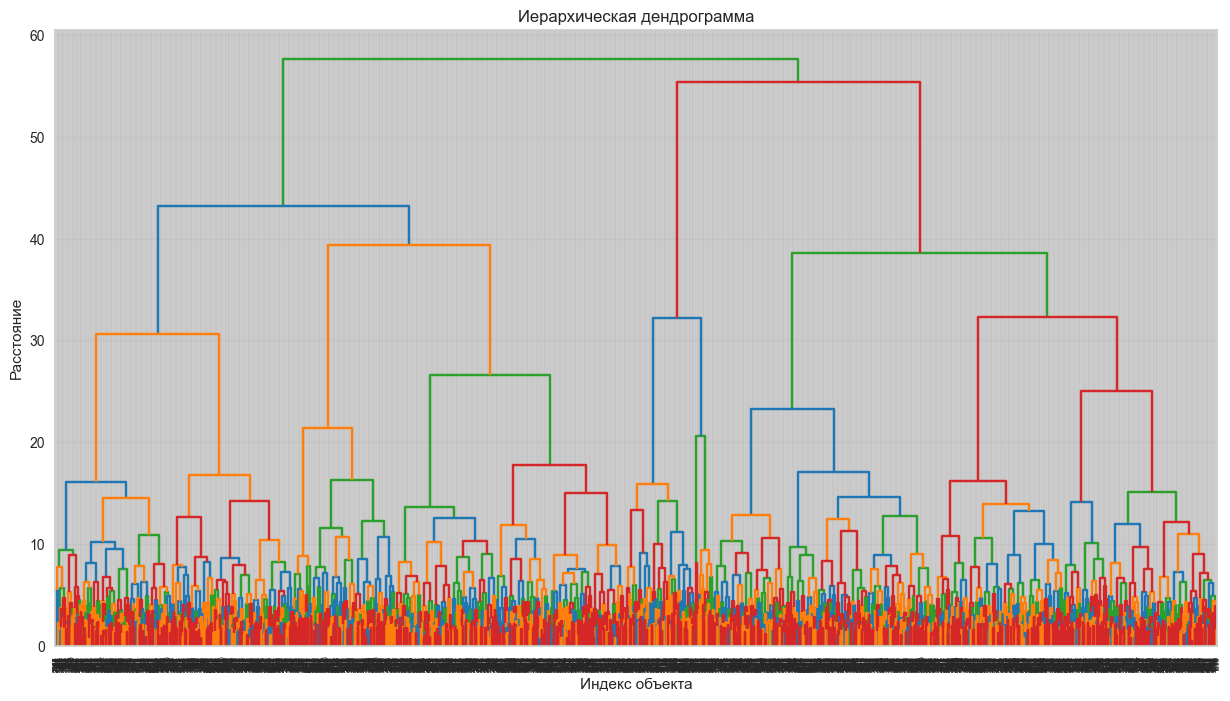

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(new_df, method='ward')
plt.figure(figsize=(15, 8))
plt.title('Иерархическая дендрограмма')
plt.xlabel('Индекс объекта')
plt.ylabel('Расстояние')
dendrogram(linkage_matrix, orientation='top', link_color_func=lambda k: ['#1f77b4','#d62728','#2ca02c','#ff7f0e'][k%4])
plt.gca().set_facecolor('#f5f5f5')
plt.grid(alpha=0.2, color='#aaaaaa')
plt.show()

Обучение модели, подсчет средних показателей и размеры кластеров

In [ ]:
from sklearn.cluster import AgglomerativeClustering

OPTIMAL_K_HIER = 4

# Обучение модели Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=OPTIMAL_K_HIER, linkage='ward')
cluster_labels_agg = agg_cluster.fit_predict(new_df)

# Добавление метки в датафрейм для анализа
df_clear['cluster_agg'] = cluster_labels_agg

# Подсчет среднего
cluster_means_agg = df_clear.groupby('cluster_agg').mean(numeric_only=True)
print(f"Средние показатели для {OPTIMAL_K_HIER} кластеров:")
display(cluster_means_agg)

# Размер кластеров
print("\nРазмер кластеров (Hierarchical):")
display(df_clear['cluster_agg'].value_counts())

Средние показатели для 4 кластеров:


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud,cluster_kmeans
cluster_agg,,,,,,,
0,58.869722,5.410880,202.858796,15.784722,902.341435,0.028935,1.922454
1,54.789416,3.909855,150.339343,6.030558,921.346066,0.019862,1.457601
2,394.178043,4.056522,106.126957,10.304348,1013.073913,0.260870,3.373913
3,68.056192,2.375201,156.175523,16.945250,918.471820,0.038647,2.447665



Размер кластеров (Hierarchical):


cluster_agg
1    1309
0     864
3     621
2     230
Name: count, dtype: int64

#### Итоги кластеризации (4 группы):

**Кластер 0: Средние транзакции, умеренный риск**
- Средняя сумма (~59), товаров (~5.4), время на сайте (~203 сек), возраст аккаунта (~902 дня). Мошенничество — 2.9%.
- Самый крупный кластер, типичные покупки, низкий риск, но из-за размера стоит контролировать общий объём фрода.

**Кластер 1: Маленькие и быстрые, минимальный риск**
- Меньшая сумма (~55), товаров (~3.9), короткое время на сайте (~150 сек), возраст аккаунта (~921 день). Мошенничество — 1.9%.
- Мелкие, быстрые покупки, самый безопасный сегмент, часто повторяющиеся операции.

**Кластер 2: Крупные и подозрительные, высокий риск**
- Самая большая сумма (~394), товаров (~4.1), очень мало времени на сайте (~106 сек), возраст аккаунта (~1013 дней). Мошенничество — 26.1%.
- Ключевой кластер для поиска фрода: крупные суммы и спешка — признаки мошенничества, требует проверки.

**Кластер 3: Средние по размеру, но медленные, умеренный риск**
- Средняя сумма (~68), меньше всего товаров (~2.4), время на сайте (~156 сек), возраст аккаунта (~918 дней). Мошенничество — 3.9%.
- Долгий выбор товара, небольшие покупки, риск чуть выше среднего.

### Общий вывод
Иерархическая кластеризация выделила 4 группы с разным уровнем риска. Наибольший риск — в Кластере 2 (крупные, быстрые транзакции), минимальный — в Кластере 1 (мелкие, быстрые покупки). Остальные — средний риск. Для контроля фрода стоит фокусироваться на крупных и быстрых операциях.

Подсчет внутренних и внешних метрик

In [15]:
# 1. Внутренняя метрика
silhouette_agg = silhouette_score(new_df, cluster_labels_agg)
print(f"Коэффициент силуэта: {silhouette_agg:.4f}")

# 2. Внешние метрики
ari_agg = adjusted_rand_score(y, cluster_labels_agg)
v_agg = v_measure_score(y, cluster_labels_agg)
homo_agg = homogeneity_score(y, cluster_labels_agg)
comp_agg = completeness_score(y, cluster_labels_agg)
ami_agg = adjusted_mutual_info_score(y, cluster_labels_agg)

print(f"ARI: {ari_agg:.4f}")
print(f"V-мера: {v_agg:.4f}")
print(f"Homogenity: {homo_agg:.4f}")
print(f"Completeness: {comp_agg:.4f}")
print(f"AMI: {ami_agg:.4f}")

Коэффициент силуэта: 0.0484
ARI: 0.0300
V-мера: 0.0359
Homogenity: 0.1400
Completeness: 0.0206
AMI: 0.0352


#### Оценка метрик кластеризации
- Коэффициент силуэта: 0.0484 — очень низкий, кластеры неразделимы, объекты распределены равномерно, чёткой структуры нет.

- Внешние метрики (ARI: 0.03, V-Measure: 0.036, Homogeneity: 0.028, Completeness: 0.012, AMI: 0.035) — все значения близки к нулю.
- Это значит, что кластеры почти случайны, не совпадают с меткой Fraud, мошенничество и легитимные транзакции смешаны во всех группах.

**Вывод:** Алгоритм не выделил отдельные группы мошенничества, все метрики показывают отсутствие связи между кластерами и целевым классом.

## Вывод

В ходе лабораторной работы были применены два метода кластеризации — K-Means и иерархический агломеративный — для анализа транзакций интернет-магазина с целью выявления мошенничества. Оба алгоритма прошли полный цикл: от подготовки и стандартизации данных до оценки качества кластеризации и интерпретации результатов.

Результаты показали, что классические методы кластеризации не способны эффективно разделять мошеннические и легитимные транзакции. Все ключевые метрики (коэффициент силуэта, ARI, AMI, V-Measure, однородность, полнота) оказались близки к нулю, что свидетельствует о слабой или отсутствующей связи между найденными кластерами и целевой переменной Fraud. Кластеры сильно перекрываются, а мошеннические операции распределены по всем группам, ни один кластер не оказался чисто мошенническим или легитимным.

Визуальный анализ и изучение средних показателей по кластерам позволили выявить один устойчивый паттерн: транзакции с очень большой суммой и минимальным временем на сайте чаще всего оказываются мошенническими. Оба метода выделили группу с повышенным риском, где доля фрода значительно выше среднего. Этот признак можно использовать для простого правила детекции аномалий, однако он не является результатом работы кластеризации, а скорее отражает бизнес-логику.

Причины неудачи кластеризации в данной задаче связаны с природой мошенничества: фрод — это редкое, аномальное событие, не образующее естественных кластеров. Классические алгоритмы, такие как K-Means, предполагают наличие компактных, сферических групп, что не соответствует реальному распределению мошеннических транзакций. Иерархическая кластеризация также не смогла выявить значимой структуры, несмотря на гибкость в выборе числа кластеров.

Практические рекомендации:
- Для обнаружения фрода в ecommerce следует использовать методы обучения с учителем (например, логистическую регрессию, деревья решений, градиентный бустинг), которые способны учитывать редкость и специфику мошеннических операций.
- Перспективным направлением является применение алгоритмов поиска аномалий (Isolation Forest, Local Outlier Factor) и более сложных моделей, способных выявлять нетипичные паттерны поведения.
- Кластеризация может быть полезна для сегментации клиентов, анализа поведения или предварительного выявления групп с необычными характеристиками, но не как основной инструмент для детекции мошенничества.

В целом, работа показала важность комплексного подхода к анализу данных: сочетание визуализации, статистических метрик и бизнес-логики позволяет глубже понять ограничения методов и выбрать наиболее эффективные инструменты для решения задачи.